In [1]:
pip install matplotlib

In [2]:
pip install seaborn nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Importing the libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pickle
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords


# Loading the data
with open("ProfileData_pickleFiles/refined_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [25]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [26]:
#Printing
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Programming,Traveller,Age
0,Evil beer aficionado. Freelance introvert. Tv fan. Food nerd. Travel expert. Passionate bacon scholar. Coffee fanatic.,"[Adventure, RomCom, Action]",Buddhist,"[Country, Pop, Romantic]",Progressive,"[LinkedIn, Facebook]","[Baseball, Chess, Basketball]","[C++, Java, C#]","[Short journeys, Long Trips, Adventure]",33
1,Passionate gamer. Evil internet aficionado. Student. Friendly tv specialist. Introvert.,"[Musical, Drama, Comedy]",Muslim,"[Jazz, Romantic, Rock]",Moderate,"[Youtube, Facebook, Pinterest]","[Cricket, Baseball, BadmintonFootball]","[C++, Swift]","[Short journeys, Long Trips, Adventure]",22
2,Social media guru. Tv expert. Amateur beer evangelist. Professional zombie fan. Twitter specialist.,"[Adventure, RomCom, Action]",Christian,"[Romantic, EDM, HipHop]",Liberal,"[Youtube, Facebook]","[Cricket, BadmintonFootball, Chess]","[C++, Swift, Go]","[Short journeys, Long Trips, Adventure]",19
3,Reader. Incurable analyst. Proud pop culture expert. Hardcore social media junkie.,"[Adventure, Action, Thriller]",Other,"[Country, Romantic]",Liberal,"[Youtube, Facebook]","[Baseball, Cricket]","[Java, JavaScript]","[Long Trips, Adventure, Treking]",24
4,Typical gamer. Friend of animals everywhere. Amateur entrepreneur. Passionate tv junkie.,"[Adventure, Drama, Action]",Christian,"[Jazz, Romantic, HipHop]",Liberal,"[Youtube, Facebook, SnapChat]","[Cricket, Hockey, Basketball]","[C++, Java, Swift]","[Adventure, Treking]",24
...,...,...,...,...,...,...,...,...,...,...
745,Social media fanatic. Typical coffee buff. Freelance twitter scholar. Beer lover. Professional writer.,"[Drama, Adventure, Comedy]",Other,"[Classical, Romantic, HipHop]",Conservative,[Facebook],"[Baseball, Cricket, Chess]","[Python, Java, Go]","[Adventure, Treking]",23
746,Student. Reader. Bacon trailblazer. Explorer. Extreme internet junkie. Alcohol buff. Entrepreneur.,"[Drama, RomCom, Adventure]",Spiritual,"[Country, Pop, HipHop]",Conservative,"[Reddit, Facebook]","[Cricket, Baseball, Chess]","[JavaScript, Java, Go]","[Short journeys, Long Trips, Treking]",42
747,Reader. Tv lover. Beer nerd. Incurable internet junkie. Infuriatingly humble travel ninja. Problem solver. Music expert. Student. Friendly thinker.,"[Horror, Action, Thriller]",Hindu,"[Jazz, Country, Romantic]",Centrist,"[Youtube, Instagram]","[Cricket, Baseball, Hockey]","[Java, JavaScript]","[Short journeys, Long Trips, Adventure]",26
748,Amateur travel expert. Organizer. Alcohol fanatic. Prone to fits of apathy. Extreme music junkie.,"[Action, Adventure]",Christian,"[Pop, Romantic, HipHop]",Moderate,"[Youtube, Reddit, Facebook]","[Baseball, Other, BadmintonFootball]","[C++, Go]","[Short journeys, Long Trips, Treking]",30


### Tokenizing the bio data

Now, the bio's of the users will be splitted into tokens(means the sentences of the bio's of users will be splited into individual words for the further process of lemmatization.)

*Lemmatization:* It is the process of getting the base form of the given word. Eg.: "lemmatization" -> "lemmatize".

In [27]:
lemma = WordNetLemmatizer()

#Tokenizer
def tokenize(sentence):
    #Tokenizing the bios
    
    #1. Stop words dictionary
    stopwords_list = stopwords.words('english')
    
    #2. Lowercasing the words
    sentence = sentence.lower()
    
    #3. Remove the punctuations
    sentence = sentence.replace('.','')
    
    #4. Space splitting
    sentence = sentence.split(' ')
    
    #5. Removing stop words and storing result in a list
    sentence = [lemma.lemmatize(i) for i in sentence if i not in stopwords_list]
    
    return sentence

df['Bios'] = df.Bios.apply(tokenize)
    
        

In [28]:
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Programming,Traveller,Age
0,"[evil, beer, aficionado, freelance, introvert, tv, fan, food, nerd, travel, expert, passionate, bacon, scholar, coffee, fanatic]","[Adventure, RomCom, Action]",Buddhist,"[Country, Pop, Romantic]",Progressive,"[LinkedIn, Facebook]","[Baseball, Chess, Basketball]","[C++, Java, C#]","[Short journeys, Long Trips, Adventure]",33
1,"[passionate, gamer, evil, internet, aficionado, student, friendly, tv, specialist, introvert]","[Musical, Drama, Comedy]",Muslim,"[Jazz, Romantic, Rock]",Moderate,"[Youtube, Facebook, Pinterest]","[Cricket, Baseball, BadmintonFootball]","[C++, Swift]","[Short journeys, Long Trips, Adventure]",22
2,"[social, medium, guru, tv, expert, amateur, beer, evangelist, professional, zombie, fan, twitter, specialist]","[Adventure, RomCom, Action]",Christian,"[Romantic, EDM, HipHop]",Liberal,"[Youtube, Facebook]","[Cricket, BadmintonFootball, Chess]","[C++, Swift, Go]","[Short journeys, Long Trips, Adventure]",19
3,"[reader, incurable, analyst, proud, pop, culture, expert, hardcore, social, medium, junkie]","[Adventure, Action, Thriller]",Other,"[Country, Romantic]",Liberal,"[Youtube, Facebook]","[Baseball, Cricket]","[Java, JavaScript]","[Long Trips, Adventure, Treking]",24
4,"[typical, gamer, friend, animal, everywhere, amateur, entrepreneur, passionate, tv, junkie]","[Adventure, Drama, Action]",Christian,"[Jazz, Romantic, HipHop]",Liberal,"[Youtube, Facebook, SnapChat]","[Cricket, Hockey, Basketball]","[C++, Java, Swift]","[Adventure, Treking]",24
...,...,...,...,...,...,...,...,...,...,...
745,"[social, medium, fanatic, typical, coffee, buff, freelance, twitter, scholar, beer, lover, professional, writer]","[Drama, Adventure, Comedy]",Other,"[Classical, Romantic, HipHop]",Conservative,[Facebook],"[Baseball, Cricket, Chess]","[Python, Java, Go]","[Adventure, Treking]",23
746,"[student, reader, bacon, trailblazer, explorer, extreme, internet, junkie, alcohol, buff, entrepreneur]","[Drama, RomCom, Adventure]",Spiritual,"[Country, Pop, HipHop]",Conservative,"[Reddit, Facebook]","[Cricket, Baseball, Chess]","[JavaScript, Java, Go]","[Short journeys, Long Trips, Treking]",42
747,"[reader, tv, lover, beer, nerd, incurable, internet, junkie, infuriatingly, humble, travel, ninja, problem, solver, music, expert, student, friendly, thinker]","[Horror, Action, Thriller]",Hindu,"[Jazz, Country, Romantic]",Centrist,"[Youtube, Instagram]","[Cricket, Baseball, Hockey]","[Java, JavaScript]","[Short journeys, Long Trips, Adventure]",26
748,"[amateur, travel, expert, organizer, alcohol, fanatic, prone, fit, apathy, extreme, music, junkie]","[Action, Adventure]",Christian,"[Pop, Romantic, HipHop]",Moderate,"[Youtube, Reddit, Facebook]","[Baseball, Other, BadmintonFootball]","[C++, Go]","[Short journeys, Long Trips, Treking]",30


### Analyzing the data

#### Printing unique words and frequnevy of each word

In [29]:
freq_map = set()

for x in df['Bios']:
    freq_map.update(x)
        
print("Number of unique words: ",len(freq_map))
unique_words = len(freq_map)

# Freq of unique words
words = []

for x in df['Bios']:
    words.extend(x)

bioUniq_freq = FreqDist(words)
bioUniq_freq.most_common(unique_words)

Number of unique words:  95


[('alcohol', 244),
 ('junkie', 226),
 ('music', 226),
 ('fanatic', 218),
 ('tv', 212),
 ('pop', 212),
 ('culture', 212),
 ('scholar', 192),
 ('travel', 186),
 ('troublemaker', 186),
 ('coffee', 184),
 ('enthusiast', 182),
 ('social', 176),
 ('medium', 176),
 ('expert', 174),
 ('internet', 162),
 ('bacon', 160),
 ('beer', 158),
 ('food', 156),
 ('passionate', 150),
 ('specialist', 146),
 ('trailblazer', 144),
 ('twitter', 142),
 ('web', 140),
 ('zombie', 134),
 ('lover', 134),
 ('ninja', 134),
 ('introvert', 128),
 ('aficionado', 124),
 ('evangelist', 124),
 ('incurable', 124),
 ('freelance', 120),
 ('wannabe', 120),
 ('evil', 118),
 ('guru', 118),
 ('subtly', 118),
 ('charming', 118),
 ('communicator', 118),
 ('student', 112),
 ('lifelong', 108),
 ('buff', 104),
 ('professional', 100),
 ('analyst', 98),
 ('hipster-friendly', 98),
 ('extreme', 98),
 ('fan', 94),
 ('infuriatingly', 94),
 ('humble', 94),
 ('geek', 88),
 ('writer', 82),
 ('general', 82),
 ('practitioner', 80),
 ('advocate'

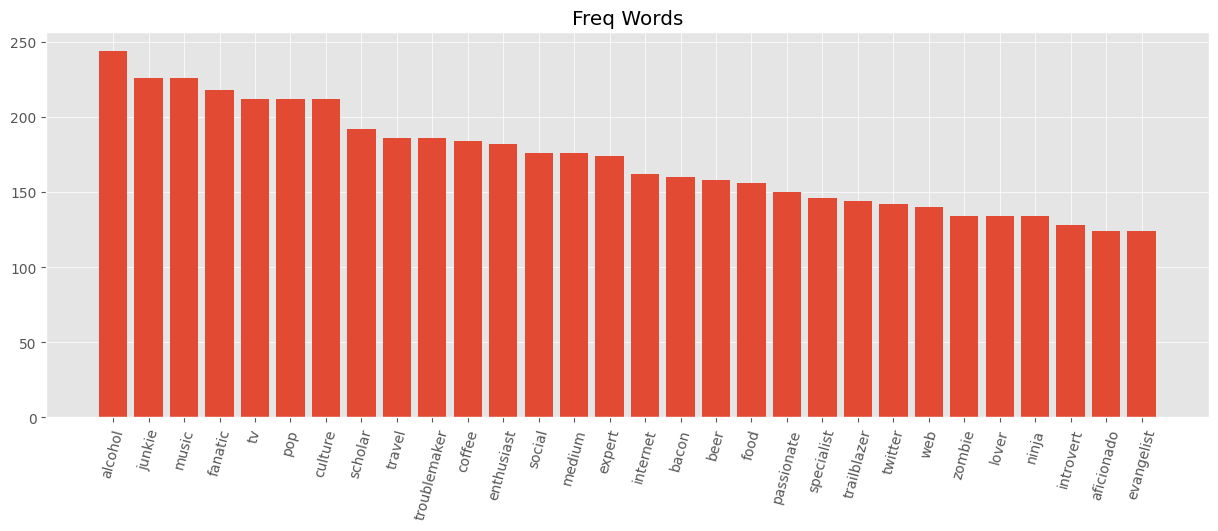

In [30]:
# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bioUniq_freq.most_common(30)))
plt.xticks(rotation=75)
plt.title('Freq Words')
plt.show()

### Trigrams collocations 

In [31]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

In [32]:
finder = TrigramCollocationFinder.from_words(words)
scoresOfBio = finder.score_ngrams(TrigramAssocMeasures().raw_freq)

In [33]:
scoresOfBio[:50]

[(('pop', 'culture', 'enthusiast'), 0.006537371976465461),
 (('friend', 'animal', 'everywhere'), 0.004358247984310307),
 (('pop', 'culture', 'fanatic'), 0.004358247984310307),
 (('pop', 'culture', 'junkie'), 0.004140335585094792),
 (('prone', 'fit', 'apathy'), 0.004140335585094792),
 (('beer', 'ninja', 'incurable'), 0.003486598387448246),
 (('enthusiast', 'lifelong', 'troublemaker'), 0.003486598387448246),
 (('geek', 'subtly', 'charming'), 0.003050773589017215),
 (('infuriatingly', 'humble', 'troublemaker'), 0.003050773589017215),
 (('junkie', 'twitter', 'enthusiast'), 0.003050773589017215),
 (('social', 'medium', 'aficionado'), 0.003050773589017215),
 (('social', 'medium', 'junkie'), 0.003050773589017215),
 (('future', 'teen', 'idol'), 0.0028328611898017),
 (('hardcore', 'social', 'medium'), 0.0026149487905861844),
 (('introvert', 'social', 'medium'), 0.0026149487905861844),
 (('alcohol', 'enthusiast', 'gamer'), 0.002397036391370669),
 (('evangelist', 'freelance', 'internet'), 0.00239

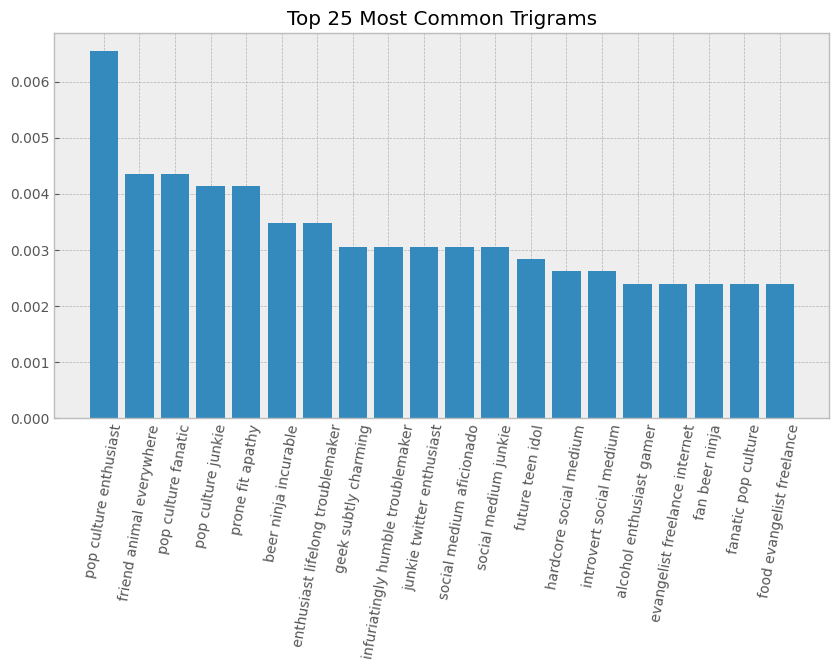

In [34]:
# Creating a list of the trigrams
trigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1]+' '+x[0][2], scoresOfBio[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], scoresOfBio[:50]))

# Combining both the scores and the bigrams
trigrams = list(zip(trigrams, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(10,5))

plt.bar(*zip(*trigrams[:20]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Trigrams')
plt.show()

### Bigrams

In [35]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [36]:
bi_finder = BigramCollocationFinder.from_words(words)
scoresOfBio_bigram = bi_finder.score_ngrams(BigramAssocMeasures().raw_freq)

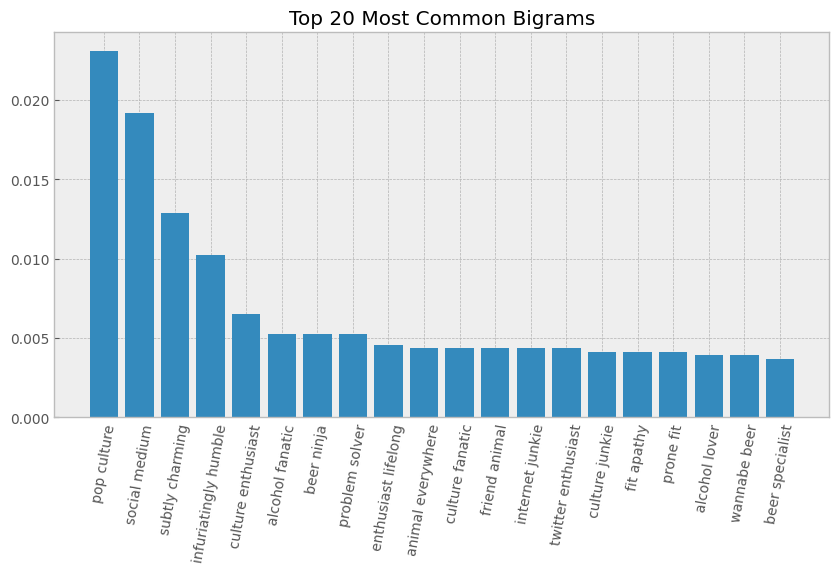

In [37]:
# Creating a list of the bigrams
bigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1], scoresOfBio_bigram[:50]))

# Creating a list of the frequency scores
bio_scores_bi = list(map(lambda x: x[1], scoresOfBio_bigram[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bigrams, bio_scores_bi))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(10,5))

plt.bar(*zip(*bigrams[:20]))
plt.xticks(rotation=80)
plt.title('Top 20 Most Common Bigrams')
plt.show()

In [38]:
#bigrams based on frequency of occurence
bi_finder.apply_freq_filter(15)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bi_finder.score_ngrams(BigramAssocMeasures.pmi)

In [39]:
bio_pmi

[(('avid', 'zombieaholic'), 9.163964091412272),
 (('fall', 'lot'), 8.704532472774977),
 (('future', 'teen'), 8.463524373271182),
 (('teen', 'idol'), 8.463524373271182),
 (('fit', 'apathy'), 7.916036577968686),
 (('prone', 'fit'), 7.916036577968686),
 (('zombieaholic', 'friend'), 7.84203599652491),
 (('animal', 'everywhere'), 7.842035996524908),
 (('friend', 'animal'), 7.842035996524908),
 (('problem', 'solver'), 7.579001590691117),
 (('coffeeaholic', 'total'), 7.409076589248803),
 (('infuriatingly', 'humble'), 6.609375239734636),
 (('extreme', 'beeraholic'), 6.549254247297064),
 (('subtly', 'charming'), 6.281321042050431),
 (('aficionado', 'avid'), 6.209767781025397),
 (('beeraholic', 'zombie'), 6.0978749009544995),
 (('entrepreneur', 'hardcore'), 6.034681074467304),
 (('geek', 'future'), 6.0040927546338825),
 (('amateur', 'entrepreneur'), 5.994039089969961),
 (('passionate', 'coffeeaholic'), 5.93514540091639),
 (('social', 'medium'), 5.704532472774977),
 (('apathy', 'general'), 5.5584

In [40]:
#trigrams based on frequency of occurence
finder.apply_freq_filter(15)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi_tri = finder.score_ngrams(TrigramAssocMeasures.pmi)

In [41]:
bio_pmi_tri

[(('avid', 'zombieaholic', 'friend'), 17.006000087937185),
 (('future', 'teen', 'idol'), 16.92704874654236),
 (('prone', 'fit', 'apathy'), 15.832073155937376),
 (('friend', 'animal', 'everywhere'), 15.684071993049821),
 (('zombieaholic', 'friend', 'animal'), 15.684071993049821),
 (('aficionado', 'avid', 'zombieaholic'), 15.373731872437672),
 (('geek', 'future', 'teen'), 14.467617127905065),
 (('teen', 'idol', 'wannabe'), 14.020158150933845),
 (('fit', 'apathy', 'general'), 13.47452115131929),
 (('passionate', 'coffeeaholic', 'total'), 13.344221990165199),
 (('amateur', 'entrepreneur', 'hardcore'), 13.028720164437267),
 (('evangelist', 'prone', 'fit'), 12.8778768455505),
 (('coffeeaholic', 'total', 'music'), 12.752861718245889),
 (('extreme', 'beeraholic', 'zombie'), 12.647129148251565),
 (('practitioner', 'typical', 'creator'), 12.337115103670936),
 (('guru', 'passionate', 'coffeeaholic'), 12.216466442966823),
 (('animal', 'everywhere', 'troublemaker'), 12.144913181941792),
 (('scholar

#### Creating trigrams in df

In [42]:
# Creating trigrams for each pair of words in the bios
df['Trigrams'] = df.Bios.apply(lambda bio: TrigramCollocationFinder.from_words(bio).nbest(TrigramAssocMeasures.pmi, 100))

In [43]:
df[['Bios', 'Trigrams']]

,Bios,Trigrams
0,"[evil, beer, aficionado, freelance, introvert, tv, fan, food, nerd, travel, expert, passionate, bacon, scholar, coffee, fanatic]","[(aficionado, freelance, introvert), (bacon, scholar, coffee), (beer, aficionado, freelance), (evil, beer, aficionado), (expert, passionate, bacon), (fan, food, nerd), (food, nerd, travel), (freelance, introvert, tv), (introvert, tv, fan), (nerd, travel, expert), (passionate, bacon, scholar), (scholar, coffee, fanatic), (travel, expert, passionate), (tv, fan, food)]"
1,"[passionate, gamer, evil, internet, aficionado, student, friendly, tv, specialist, introvert]","[(aficionado, student, friendly), (evil, internet, aficionado), (friendly, tv, specialist), (gamer, evil, internet), (internet, aficionado, student), (passionate, gamer, evil), (student, friendly, tv), (tv, specialist, introvert)]"
2,"[social, medium, guru, tv, expert, amateur, beer, evangelist, professional, zombie, fan, twitter, specialist]","[(amateur, beer, evangelist), (beer, evangelist, professional), (evangelist, professional, zombie), (expert, amateur, beer), (fan, twitter, specialist), (guru, tv, expert), (medium, guru, tv), (professional, zombie, fan), (social, medium, guru), (tv, expert, amateur), (zombie, fan, twitter)]"
3,"[reader, incurable, analyst, proud, pop, culture, expert, hardcore, social, medium, junkie]","[(analyst, proud, pop), (culture, expert, hardcore), (expert, hardcore, social), (hardcore, social, medium), (incurable, analyst, proud), (pop, culture, expert), (proud, pop, culture), (reader, incurable, analyst), (social, medium, junkie)]"
4,"[typical, gamer, friend, animal, everywhere, amateur, entrepreneur, passionate, tv, junkie]","[(amateur, entrepreneur, passionate), (animal, everywhere, amateur), (entrepreneur, passionate, tv), (everywhere, amateur, entrepreneur), (friend, animal, everywhere), (gamer, friend, animal), (passionate, tv, junkie), (typical, gamer, friend)]"
...,...,...
745,"[social, medium, fanatic, typical, coffee, buff, freelance, twitter, scholar, beer, lover, professional, writer]","[(beer, lover, professional), (buff, freelance, twitter), (coffee, buff, freelance), (fanatic, typical, coffee), (freelance, twitter, scholar), (lover, professional, writer), (medium, fanatic, typical), (scholar, beer, lover), (social, medium, fanatic), (twitter, scholar, beer), (typical, coffee, buff)]"
746,"[student, reader, bacon, trailblazer, explorer, extreme, internet, junkie, alcohol, buff, entrepreneur]","[(alcohol, buff, entrepreneur), (bacon, trailblazer, explorer), (explorer, extreme, internet), (extreme, internet, junkie), (internet, junkie, alcohol), (junkie, alcohol, buff), (reader, bacon, trailblazer), (student, reader, bacon), (trailblazer, explorer, extreme)]"
747,"[reader, tv, lover, beer, nerd, incurable, internet, junkie, infuriatingly, humble, travel, ninja, problem, solver, music, expert, student, friendly, thinker]","[(beer, nerd, incurable), (expert, student, friendly), (humble, travel, ninja), (incurable, internet, junkie), (infuriatingly, humble, travel), (internet, junkie, infuriatingly), (junkie, infuriatingly, humble), (lover, beer, nerd), (music, expert, student), (nerd, incurable, internet), (ninja, problem, solver), (problem, solver, music), (reader, tv, lover), (solver, music, expert), (student, friendly, thinker), (travel, ninja, problem), (tv, lover, beer)]"
748,"[amateur, travel, expert, organizer, alcohol, fanatic, prone, fit, apathy, extreme, music, junkie]","[(alcohol, fanatic, prone), (amateur, travel, expert), (apathy, extreme, music), (expert, organizer, alcohol), (extreme, music, junkie), (fanatic, prone, fit), (fit, apathy, extreme), (organizer, alcohol, fanatic), (prone, fit, apathy), (travel, expert, organizer)]"


In [44]:
# Pickling the tokenized words and trigrams
with open("trigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)